0


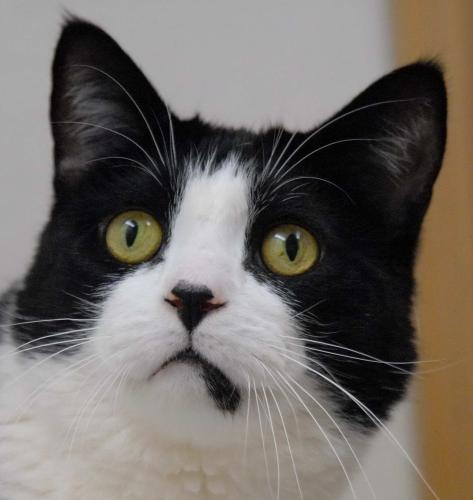

In [1]:
# DO NOT RUN THIS CELL unless you want to download the dataset again using datasets library
from datasets import load_dataset

train_dataset = load_dataset("rokmr/pets", split="train")
test_dataset = load_dataset("rokmr/pets", split="test")

#To view label
print(train_dataset[0]["label"])

#To view image
train_dataset[0]["image"]

# SynapSee experiment

In [1]:
# Run this cell to run the app


from SynapSee_exp import run_app

# run with synthetic 
run_app()

# In windows 
#run_app(port="COM3") # sometimes COM4

# In Mac
#run_app(port="/dev/...") 



Initializing ImageApp
Initializing UI
Initialized UI
Initialized ImageApp
Starting display
start bci
BCI stream started.
Started BCI
Loading images
Loaded images
Started display
BCI stream stopped.
             Fz         C3         Cz          C4          Pz         PO7  \
0     11.729610  28.605612  51.676132   77.387440  112.050488  113.328533   
1     13.554696  34.440970  57.872174  101.689261  126.506697  146.632447   
2     15.198570  42.045361  75.367979   91.750076  121.664445  100.726406   
3     16.803646  46.605967  71.567667   92.066356   79.774251   48.561630   
4     18.323469  45.954816  64.289222   61.161149   38.134212   10.634587   
...         ...        ...        ...         ...         ...         ...   
7245   3.412408  -2.296374  -7.646536  -23.827187  -12.106404   34.682270   
7246   4.862925   0.114731  -5.024187  -25.010089  -25.583350  -12.765521   
7247   6.551777   7.162983   4.828506   -4.819211  -13.321235  -22.214107   
7248   8.309489  14.194241  19.2

SystemExit: 0

c:\Users\mateo\anaconda3\envs\synapsee\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
# count number of classes
num_classes = len(train_dataset.features["label"].names)
num_classes

3

In [3]:
# get count of each class
from collections import Counter
print(Counter(train_dataset["label"]))
print(Counter(test_dataset["label"]))
# check class names
print(train_dataset.features["label"].names)

Counter({0: 300, 1: 300, 2: 300})
Counter({0: 50, 1: 50, 2: 50})
['cat', 'dog', 'rabbit']


In [4]:
for item in train_dataset:
    if 'image' in item:
        image_data = item['image']

In [5]:
for item in test_dataset:
    print(item['image'])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x21196E88310>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x441 at 0x21197FC4990>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x245 at 0x21196EB4650>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=309x270 at 0x21196E88450>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=368x500 at 0x21196EB4950>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x432 at 0x21196EB5890>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x21196EB7450>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240 at 0x21196EB6F10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x251 at 0x21196EB6990>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x321 at 0x21196EB7C10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270 at 0x21196EB56D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x386 at 0x21196EB7C50>
<PIL.JpegImagePlugin.JpegIma

In [6]:
train_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 900
})

In [6]:
#get current date
import datetime
now = datetime.datetime.now()
print(now.strftime("%Y%m%d%H%M")) 

-202311211751


In [3]:
import pandas as pd

timestamps = pd.read_csv('timestamps.csv', header=None)
timestamps

,0,1
0,images/train/cat/0.jpg,Mon Nov 20 16:03:00 2023
1,images/train/cat/1.jpg,Mon Nov 20 16:03:01 2023
2,images/train/cat/2.jpg,Mon Nov 20 16:03:02 2023
3,images/train/cat/3.jpg,Mon Nov 20 16:03:03 2023
4,images/train/cat/4.jpg,Mon Nov 20 16:03:04 2023
...,...,...
1195,images/train/control/295.jpeg,Mon Nov 20 16:27:08 2023
1196,images/train/control/296.jpeg,Mon Nov 20 16:27:09 2023
1197,images/train/control/297.jpeg,Mon Nov 20 16:27:10 2023
1198,images/train/control/298.jpeg,Mon Nov 20 16:27:11 2023


In [2]:
# This code was used to rename the images in the dataset
# they originally had other names since they were downloaded from the IMAGENET dataset
import os

def rename_images(folder_path):
    # List all files in the directory
    files = os.listdir(folder_path)

    # Loop through each file and rename it
    for i, filename in enumerate(files):
        # Define the new file name
        new_filename = f"{i}.JPEG" 

        # Define the source and destination file paths
        src = os.path.join(folder_path, filename)
        dst = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(src, dst)

        print(f"Renamed {filename} to {new_filename}")

# Specify the path to your folder here
folder_path = 'images/test/control'
rename_images(folder_path)


Renamed ILSVRC2012_val_00001126_n02909870.JPEG to 0.JPEG
Renamed ILSVRC2012_val_00001127_n04179913.JPEG to 1.JPEG
Renamed ILSVRC2012_val_00001130_n12057211.JPEG to 2.JPEG
Renamed ILSVRC2012_val_00001134_n03937543.JPEG to 3.JPEG
Renamed ILSVRC2012_val_00001135_n02730930.JPEG to 4.JPEG
Renamed ILSVRC2012_val_00001136_n01795545.JPEG to 5.JPEG
Renamed ILSVRC2012_val_00001138_n01632777.JPEG to 6.JPEG
Renamed ILSVRC2012_val_00001139_n03584829.JPEG to 7.JPEG
Renamed ILSVRC2012_val_00001140_n03709823.JPEG to 8.JPEG
Renamed ILSVRC2012_val_00001173_n04192698.JPEG to 9.JPEG
Renamed ILSVRC2012_val_00001174_n04330267.JPEG to 10.JPEG
Renamed ILSVRC2012_val_00001175_n03729826.JPEG to 11.JPEG
Renamed ILSVRC2012_val_00001176_n02607072.JPEG to 12.JPEG
Renamed ILSVRC2012_val_00001177_n02504458.JPEG to 13.JPEG
Renamed ILSVRC2012_val_00001178_n03769881.JPEG to 14.JPEG
Renamed ILSVRC2012_val_00001179_n02018207.JPEG to 15.JPEG
Renamed ILSVRC2012_val_00001180_n03929855.JPEG to 16.JPEG
Renamed ILSVRC2012_val_0